# Jeopardy!

This is a project from the Codecademy Data Science pathway.

In this project I will write several functions that investigate a dataset of *Jeopardy!* questions and answers. 

The data was provided in `jeopardy.csv` and the initial code below was provided:

In [265]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [266]:
jeopardy_data = pd.read_csv('jeopardy.csv')
jeopardy_data

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams
...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 riddles posed by the heroine,Turandot
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",$2000,"In North America this term is properly applied to only 4 species that are crested, including the tufted",a titmouse
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up, the barber shaves another customer--then flays him alive!",Clive Barker
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona is my land, my home, my father's land, to which I now ask to... return""",Geronimo


Exploring through the data a bit and trying to print each column individually, I notice that some column names have a leading space. To clean this up, I will rename those columns.

In [267]:
cols = jeopardy_data.columns
replace_dict = {}
for col in cols:
    if col.startswith(' '):
        replace_dict[col] = col.strip()
replace_dict

{' Air Date': 'Air Date',
 ' Round': 'Round',
 ' Category': 'Category',
 ' Value': 'Value',
 ' Question': 'Question',
 ' Answer': 'Answer'}

In [268]:
jeopardy_data = jeopardy_data.rename(columns = replace_dict)
jeopardy_data

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams
...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 riddles posed by the heroine,Turandot
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",$2000,"In North America this term is properly applied to only 4 species that are crested, including the tufted",a titmouse
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up, the barber shaves another customer--then flays him alive!",Clive Barker
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona is my land, my home, my father's land, to which I now ask to... return""",Geronimo


Now write a function that will filter the datset for questions that contain all of the words in a list of words.

In [269]:
def find_all_words(df, words, inc_substrings=True):
    if inc_substrings == True:
        check = lambda x: all(word.lower() in x.lower() for word in words)
        new_df = df.loc[df["Question"].apply(check)]
    else:
        check = lambda x: all((" " + word + " ").lower() in x.lower() for word in words)
        new_df = df.loc[df["Question"].apply(check)]
    return new_df
subset = find_all_words(jeopardy_data, ['King', 'England'], True)
subset

,Show Number,Air Date,Round,Category,Value,Question,Answer
4953,3003,1997-09-24,Double Jeopardy!,"""PH""UN WORDS",$200,"Both England's King George V & FDR put their stamp of approval on this ""King of Hobbies""",Philately (stamp collecting)
6337,3517,1999-12-14,Double Jeopardy!,Y1K,$800,"In retaliation for Viking raids, this ""Unready"" king of England attacks Norse areas of the Isle of Man",Ethelred
9191,3907,2001-09-04,Double Jeopardy!,WON THE BATTLE,$800,This king of England beat the odds to trounce the French in the 1415 Battle of Agincourt,Henry V
11710,2903,1997-03-26,Double Jeopardy!,BRITISH MONARCHS,$600,"This Scotsman, the first Stuart king of England, was called ""The Wisest Fool in Christendom""",James I
13454,4726,2005-03-07,Jeopardy!,A NUMBER FROM 1 TO 10,$1000,It's the number that followed the last king of England named William,4
...,...,...,...,...,...,...,...
208295,4621,2004-10-11,Jeopardy!,THE VIKINGS,$600,In 1066 this great-great grandson of Rollo made what some call the last Viking invasion of England,William the Conqueror
208742,4863,2005-11-02,Double Jeopardy!,BEFORE & AFTER,"$3,000",Dutch-born king who ruled England jointly with Mary II & is a tasty New Zealand fish,William of Orange roughy
213870,5856,2010-02-15,Double Jeopardy!,URANUS,$1600,In 1781 William Herschel discovered Uranus & initially named it after this king of England,George III
216021,1881,1992-11-09,Double Jeopardy!,HISTORIC NAMES,$1000,"His nickname was ""Bertie"", but he used this name & number when he became king of England in 1901",Edward VII


In order to calculate aggregate statistics on the `"Value"` column, we first need to first remove the "$", "," signs and "None", and then convert that column to float values. 

In [270]:
import numpy as np
jeopardy_data["Value"] = jeopardy_data["Value"].replace({"\$":"", ",":"", "None":np.nan}, regex = True)
jeopardy_data["Value"] = jeopardy_data["Value"].astype(float)
jeopardy_data

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200.0,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200.0,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200.0,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200.0,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200.0,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams
...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,2000.0,This Puccini opera turns on the solution to 3 riddles posed by the heroine,Turandot
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",2000.0,"In North America this term is properly applied to only 4 species that are crested, including the tufted",a titmouse
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,2000.0,"In Penny Lane, where this ""Hellraiser"" grew up, the barber shaves another customer--then flays him alive!",Clive Barker
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,2000.0,"From Ft. Sill, Okla. he made the plea, Arizona is my land, my home, my father's land, to which I now ask to... return""",Geronimo


Now use the `"Value"` column to determine the average value of questions containing a particular word.

In [271]:
king_questions = find_all_words(jeopardy_data, ["king"], False)
king_avg_value = king_questions["Value"].mean()
king_avg_value

821.2250712250712

Now write a function that returns the count of the unique answers to all of the questions in a dataset. For example, after filtering the entire dataset to only questions containing the word `"King"`, we could then find all of the unique answers to those questions. The answer “Henry VIII” appeared 3 times and was the most common answer.

In [272]:
def count_answers(df):
    return df["Answer"].value_counts()

count_answers(king_questions)


Henry VIII             31
Richard III            20
Norway                 18
Sweden                 18
Solomon                17
                       ..
ravens                  1
Regent's Park           1
Pillsbury               1
Regan (for "range")     1
George Washington       1
Name: Answer, Length: 1040, dtype: int64

To see the rows containing this answer, we can form the following DataFrame.

In [273]:
king_questions[king_questions['Answer'] == 'Henry VIII']

,Show Number,Air Date,Round,Category,Value,Question,Answer
1398,3362,1999-03-30,Jeopardy!,THEATRE HODGEPODGE,500.0,"Shakespeare's play about this Tudor king begins, ""I come no more to make you laugh...""",Henry VIII
3379,5334,2007-11-15,Double Jeopardy!,HISTORIC BIRTH ANNOUNCEMENTS,800.0,"This king is thrilled by the birth of Mary, Feb. 18, 1516; there's still plenty of time to have a son--right?",Henry VIII
7865,3501,1999-11-22,Double Jeopardy!,CAMBRIDGE UNIVERSITY,400.0,This Tudor king founded Cambridge's Trinity College in 1546,Henry VIII
22359,3245,1998-10-16,Double Jeopardy!,WOMEN WHO STRAYED,600.0,Queen Catherine Howard went from headstrong to headless when she cheated on this king in 1541,Henry VIII
36122,5754,2009-09-24,Double Jeopardy!,PASSIVE-AGGRESSIVE HISTORY,400.0,"Some reports have this 16th century British king weighing in at 400 lbs., so calling him ""Pork Chop"", even lovingly... bad idea",Henry VIII
36511,5028,2006-06-21,Jeopardy!,1491,400.0,"Born in 1491, this future king had a nurse named Anne Luke--not the last Anne he'd nuzzle",Henry VIII
43122,3937,2001-10-16,Double Jeopardy!,"OH, HENRY!",400.0,The father of England's King Edward VI,Henry VIII
46258,6087,2011-02-15,Double Jeopardy!,CAMBRIDGE,1200.0,"In 1546 this king founded Trinity College, the largest of Cambridge's colleges",Henry VIII
47271,2908,1997-04-02,Double Jeopardy!,THE EMMYS,800.0,"Keith Michell won for playing this king in the ""Catherine Howard"" episode of a 1971 series",Henry VIII
54011,1423,1990-11-07,Double Jeopardy!,BRITISH ROYALTY,400.0,Hefty king whose sister Mary was the grandmother of Lady Jane Grey,Henry VIII


I will now develop a function that will display the frequency of a category over time.

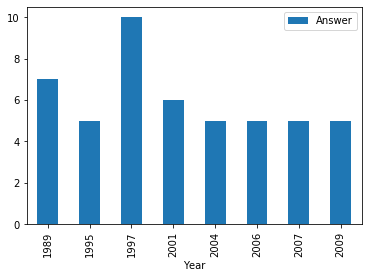

In [314]:
import matplotlib.pyplot as plt
import datetime
def category_over_time(df, category):
    df['Year'] = df["Air Date"].str[:4].astype(int)
    new_df = df[df["Category"].str.lower() == category.lower()].groupby(["Year"]).count()[["Answer"]].plot(kind='bar')
  
    
category_over_time(jeopardy_data, 'The Emmys')

Now I will attemt to make my own quiz gernerator from the dataset!

In [284]:
import random
import time
def play(df, rounds):
    score = 0
    name = input("Welcome to Jeopardy! I hope you're ready to play! \n Please enter your name:  ")
    time.sleep(2)
    print("Hi there, " + name + "! Get ready for Round 1\n")

    for round in range(rounds):
        print("\n--------------------------------------------------")
        time.sleep(2)
        print("Round number " + str(round +1) + "!\n")
        q_num = random.randint(0, len(df))
        question = df["Question"][q_num]
        points = df["Value"][q_num]
        time.sleep(2)
        print("For " + str(points) + " points:\n ")
        time.sleep(2)
        player_answer = input(question + "\n\n")
        answer = df["Answer"][q_num]
        time.sleep(2)
        if player_answer.lower() == answer.lower():
            print("\nCorrect! Great job, you earned " + str(points) + " points!\n")
            score += points
            time.sleep(2)
            print("Your total score is now: " + str(score) + "!\n")
        else:
            print("\nShoot, that's not correct.\n")
            time.sleep(2)
            print("The correct answer was:  \n")
            time.sleep(2)
            print(answer)
            time.sleep(2)
            print("Your score remains: " + str(score) + "\n")
    time.sleep(2)
    print("\n\n\nThat's the end of the game! Thanks for playing! Your final score was: " + str(score) + "!")
    time.sleep(1)
    print("Play again soon!")
        

In [285]:
play(jeopardy_data, 3)

Welcome to Jeopardy! I hope you're ready to play! 
 Please enter your name:  John
Hi there, John! Get ready for Round 1


--------------------------------------------------
Round number 1!

For 100.0 points:
 
In driver's training you learn this light means to slow down & be prepared to stop, not hurry up to beat the red

yellow

Correct! Great job, you earned 100.0 points!

Your total score is now: 100.0!


--------------------------------------------------
Round number 2!

For 1600.0 points:
 
Usually, it's a domestic hen less than one year old

chick

Shoot, that's not correct.

The correct answer was:  

a pullet
Your score remains: 100.0


--------------------------------------------------
Round number 3!

For 600.0 points:
 
A chest of drawers, or a government department

cabinet

Shoot, that's not correct.

The correct answer was:  

a bureau
Your score remains: 100.0




That's the end of the game! Thanks for playing! Your final score was: 100.0!
Play again soon!
